epochs: 100
accuracy:0.8623188405797102
epochs: 200
accuracy:0.8623188405797102
epochs: 300
accuracy:0.8623188405797102
epochs: 400
accuracy:0.8623188405797102
epochs: 500
accuracy:0.8623188405797102
epochs: 600
accuracy:0.8623188405797102
epochs: 700
accuracy:0.8695652173913043
epochs: 800
accuracy:0.8768115942028986
epochs: 900
accuracy:0.9057971014492754


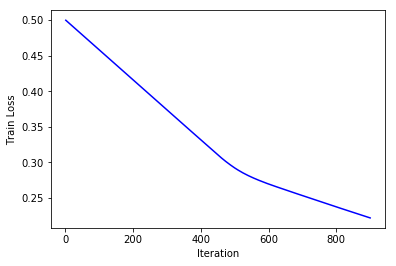

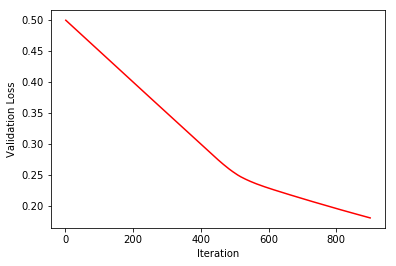

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#define loss function
def loss(C,threshold,w,x,y):
    loss_part_1=np.dot(w.T,w)/2
    loss_part_2=0
    #get the volume of data
    data_volume=x.shape[0]
    #calculate loss for each record
    for i in range(data_volume):
        hinge=1-y[i]*(np.dot(x[i],w))
        if hinge>=threshold:
            loss_part_2+=hinge
    #calculate the total loss
    loss_all=(loss_part_1+C*loss_part_2)/data_volume
    return loss_all

#define gradient calculating function
def gradient(C,threshold,w,b,x,y):
    grad_w=np.zeros_like(w)
    grad_b=0
    #get the volume of data
    data_volume=x.shape[0]
    #calculate gradient for each record
    for i in range(data_volume):
        hinge=1-y[i]*(np.dot(x[i],w))
        #deal with uncontinuous gradient
        if hinge>=threshold:
            grad_w=grad_w-C*y[i]*x[i].T
            grad_b=grad_b-C*y[i]
    
    grad_w=grad_w+w
    return grad_w/data_volume,grad_b/data_volume

#define predict function
def predict(threshold,w,b,x):
    y_predict=np.dot(x,w)+b
    y_predict=y_predict.reshape((-1,1))
    #mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative
    for yp in range(len(y_predict)):
        if(y_predict[yp]>=threshold):
            y_predict[yp]=1
        else:
            y_predict[yp]=-1
    
    return y_predict

#define accuracy function
def accuracy(threshold,w,b,x,y):
    #get the prediction result
    y_predict=predict(threshold,w,b,x)
    #use a counter to count the number of correct prediction
    correct_counter=0
    #compare the prediction result and the truth
    for i in range(len(y)):
        if y_predict[i]==y[i]:
            correct_counter=correct_counter+1
    
    #calculate the accuracy
    accuracy=correct_counter/len(y)
    return accuracy

#load data
data=load_svmlight_file("australian_scale.txt")
#sperate features and labels
X,y=data[0],data[1]
#divide data into trainning data and testing data
X_train,X_test,y_train_truth,y_test_truth=train_test_split(X,y,test_size=0.2,random_state=10)
#change sparse martix to numpy array
X_train=X_train.toarray()
X_test=X_test.toarray()

#construct model
#set parameter 
C=0.5
learning_rate=0.002
epochs=900
threshold=0
#initialize parameters
w=np.zeros(X_train.shape[1])
b=0

#initialize contrainers for train loss and validation loss
losses_train=np.zeros(epochs)
losses_validation=np.zeros(epochs)

#optimize
for i in range(epochs):
    #get step by calculating gradient 
    G_w,G_b=gradient(C,threshold,w,b,X_train,y_train_truth)
    D_w=-G_w
    D_b=-G_b
    #change weight vector
    w=w+learning_rate*D_w
    b=b+learning_rate*D_b
    #calculate the train loss and the validation loss
    loss_train=loss(C,threshold,w,X_train,y_train_truth)
    loss_validation=loss(C,threshold,w,X_test,y_test_truth)
    #save the train loss and the validation loss in the contrainer
    losses_train[i]=loss_train
    losses_validation[i]=loss_validation
    
    #log every 100 epochs
    if(i%100==99):
        print("epochs: "+str(i+1))
        print("accuracy:"+str(accuracy(threshold,w,b,X_test,y_test_truth)))

#draw graph of the train loss with the number of iterations
x_axis=np.arange(epochs)+1
plt.figure(1)
plt.plot(x_axis,losses_train,'b')
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.show()
#draw graph of the validation loss with the number of iterations 
plt.figure(2)
plt.plot(x_axis,losses_validation,'r')
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.show()